In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## DF people

In [3]:
people = pd.read_csv(r"C:\Users\Sávio\Desktop\estudos_prog\ada\exercicio_ifood\ifood_people.csv")
people.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome
0,5524,1957,Graduation,Single,58138.0,0,0
1,2174,1954,Graduation,Single,46344.0,1,1
2,4141,1965,Graduation,Together,71613.0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0
4,5324,1981,PhD,Married,58293.0,1,0


In [4]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              2240 non-null   int64  
 1   Year_Birth      2240 non-null   int64  
 2   Education       2240 non-null   object 
 3   Marital_Status  2240 non-null   object 
 4   Income          2216 non-null   float64
 5   Kidhome         2240 non-null   int64  
 6   Teenhome        2240 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 122.6+ KB


In [39]:
people.duplicated().sum()

0

In [9]:
people.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250
std,3246.662198,11.984069,25173.076661,0.538398,0.544538
min,0.000000,1893.000000,1730.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000


In [5]:
people.Year_Birth.min() 

1893

### Os seguintes clientes serão excluídos dado que seus registros de idade ultrapassam 111 anos (2011 #fundação do ifood - ano de nascimento)

In [8]:
people[people.Year_Birth < 1911] #esses valores serão dropados

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome
192,7829,1900,2n Cycle,Divorced,36640.0,1,0
239,11004,1893,2n Cycle,Single,60182.0,0,1
339,1150,1899,PhD,Together,83532.0,0,0


In [43]:
people['Son'] = people['Kidhome'] + people['Teenhome']

### 

In [18]:
marital_status = people.Marital_Status.value_counts() 
proportion_marital = (marital_status / marital_status.sum()) *100
proportion_marital = proportion_marital.reset_index()
proportion_marital

,Marital_Status,count
0,Married,38.571429
1,Together,25.892857
2,Single,21.428571
3,Divorced,10.357143
4,Widow,3.437500
5,Alone,0.133929
6,Absurd,0.089286
7,YOLO,0.089286


In [54]:
absurdos = ['Alone','Absurd', 'YOLO']

Substituindo os status ['Alone','Absurd', 'YOLO'] por 'Single' por entender que se referenciam a pessoas solteiras

In [55]:
people.Marital_Status.replace(absurdos, 'Single', inplace=True)

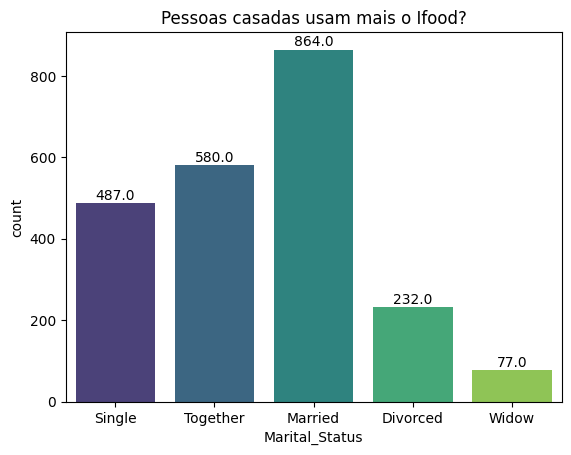

In [56]:
ax = sns.countplot(x='Marital_Status', data=people, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()-15), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Pessoas casadas usam mais o Ifood?')
plt.show()

<Axes: xlabel='Marital_Status', ylabel='Income'>

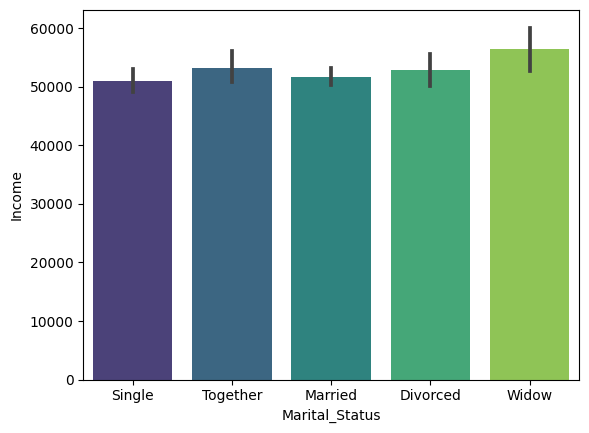

In [57]:
sns.barplot(x='Marital_Status', y='Income', data = people, palette='viridis')

In [40]:
people.Kidhome.value_counts()

Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64

In [41]:
people.Teenhome.value_counts()

Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64

In [44]:
people.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Son
0,5524,1957,Graduation,Single,58138.0,0,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2
2,4141,1965,Graduation,Together,71613.0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,1
4,5324,1981,PhD,Married,58293.0,1,0,1


In [58]:
people.Son.value_counts()

Son
1    1128
0     638
2     421
3      53
Name: count, dtype: int64

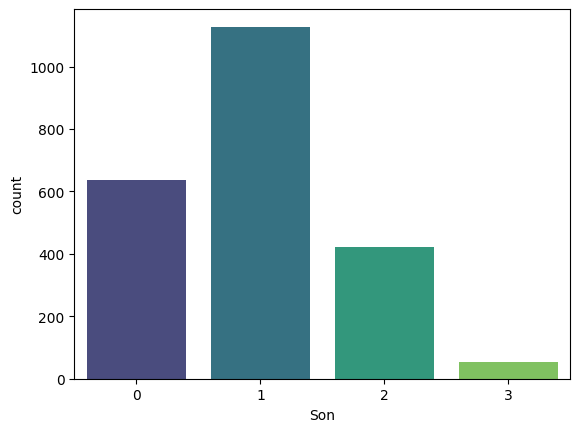

In [62]:
ax = sns.countplot(x='Son', data=people, palette='viridis')

In [59]:
people.Education.value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

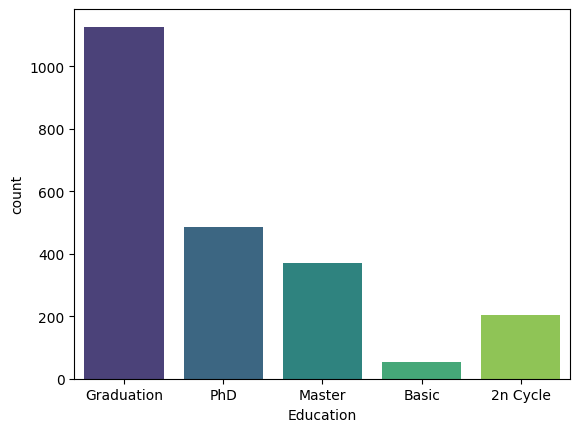

In [61]:
ax = sns.countplot(x='Education', data=people, palette='viridis')

In [50]:
people[people['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Son
10,1994,1983,Graduation,Married,NaN,1,0,1
27,5255,1986,Graduation,Single,NaN,1,0,1
43,7281,1959,PhD,Single,NaN,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,3
58,8557,1982,Graduation,Single,NaN,1,0,1
71,10629,1973,2n Cycle,Married,NaN,1,0,1
90,8996,1957,PhD,Married,NaN,2,1,3
91,9235,1957,Graduation,Single,NaN,1,1,2
92,5798,1973,Master,Together,NaN,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,1


In [48]:
(people['Income'].isna().sum() / len(people['Income'])) *100

1.0714285714285714

## DF Campanha

In [63]:
campanha = pd.read_csv(r"C:\Users\Sávio\Desktop\estudos_prog\ada\exercicio_ifood\ifood_previous_campaing.csv")

In [64]:
campanha.head()

,ID,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,0,0,0,0,0,0,3,11,1
1,2174,0,0,0,0,0,0,3,11,0
2,4141,0,0,0,0,0,0,3,11,0
3,6182,0,0,0,0,0,0,3,11,0
4,5324,0,0,0,0,0,0,3,11,0


In [65]:
campanha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ID             2240 non-null   int64
 1   AcceptedCmp3   2240 non-null   int64
 2   AcceptedCmp4   2240 non-null   int64
 3   AcceptedCmp5   2240 non-null   int64
 4   AcceptedCmp1   2240 non-null   int64
 5   AcceptedCmp2   2240 non-null   int64
 6   Complain       2240 non-null   int64
 7   Z_CostContact  2240 non-null   int64
 8   Z_Revenue      2240 non-null   int64
 9   Response       2240 non-null   int64
dtypes: int64(10)
memory usage: 175.1 KB


In [68]:
campanha.describe()

,ID,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [66]:
campanha.Complain.value_counts()

Complain
0    2219
1      21
Name: count, dtype: int64

In [67]:
campanha.Z_CostContact.value_counts()

Z_CostContact
3    2240
Name: count, dtype: int64

## DF profile

In [69]:
profile = pd.read_csv(r"C:\Users\Sávio\Desktop\estudos_prog\ada\exercicio_ifood\ifood_purchase_profile.csv")

In [70]:
profile.head()

,ID,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7
1,2174,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5
2,4141,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4
3,6182,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6
4,5324,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5


In [71]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Dt_Customer          2240 non-null   object
 2   Recency              2240 non-null   int64 
 3   MntWines             2240 non-null   int64 
 4   MntFruits            2240 non-null   int64 
 5   MntMeatProducts      2240 non-null   int64 
 6   MntFishProducts      2240 non-null   int64 
 7   MntSweetProducts     2240 non-null   int64 
 8   MntGoldProds         2240 non-null   int64 
 9   NumDealsPurchases    2240 non-null   int64 
 10  NumWebPurchases      2240 non-null   int64 
 11  NumCatalogPurchases  2240 non-null   int64 
 12  NumStorePurchases    2240 non-null   int64 
 13  NumWebVisitsMonth    2240 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 245.1+ KB


In [76]:
profile.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0
NumDealsPurchases,2240.0,2.325000,1.932238,0.0,1.00,2.0,3.00,15.0
NumWebPurchases,2240.0,4.084821,2.778714,0.0,2.00,4.0,6.00,27.0
